# Series temporales

## Introducción

Las series temporales es un área de la ciencia de datos que se encarga de hacer predicciones sobre eventos futuros, analizando las tendencias de las variables en el pasado. 

A diferencia de otros modelos, las series temporales se enfocan en la evolución a lo largo del tiempo de las variables que tenemos en nuestros datos, mientras que en el resto de modelos solemos tener el estado de nuestras variables en el momento en el que se obtuvieron los datos.


Imagina que tienes un set de datos sobre unos ocupación de un parking en el que podemos ver cuándo están ocupadas cada una de las plazas y durante cuánto tiempo. ¿Podríamos predecir, basándonos en los datos que tenemos, cúando va a estar libre una plaza? 
Una serie temporal te ayudaría a entender el comportamiento de ocupación de las plazas de los clientes del parking y por lo tanto predecir cuándo una plaza se va a quedar libre. 

En esta familia de modelos, vamos a explorar los siguientes modelos: 
- ARIMA 
- FBProphet



Vamos a cubrir algunas características que son importantes en las series temporales. 

### Tendencia
Se refiere a los incrementos o decrementos de las variables que estamos prediciendo usando nuestra serie temporal. 

### Estacionalidad
La estacionalidad refleja las variaciones periódicas en el valor de las variables que estamos prediciendo con nuestra serie temporal. Las vacaciones o los días festivos pueden generar estacionalidad en nuestras variables. 

### Cambios bruscos
Son variaciones abruptas en el comportamiento de las variables que estamos prediciendo con nuestra serie temporal. El impacto del COVID es un ejemplo de cambio brusco que podemos encontrar en nuestros datos.

Estas características normalmente influyen negativamente en las predicciones de las series temporales y tenemos que entenderlas e identificarlas para poder decidir si queremos eliminarlas de nuestros datos. 

### Estacionariedad 
Decimos que una serie temporal es estacionaria si la media y la variabilidad de la serie temporal no depende del tiempo y no presenta tendencias ni cambios bruscos. 

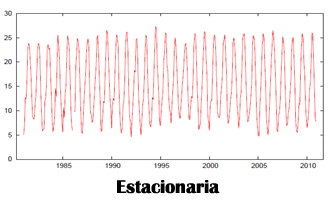 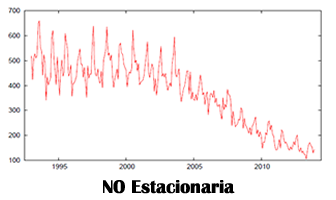



## ARIMA

El modelo ARIMA es una de las implementaciones para analizar series temporales que vamos a explorar. Su nombre es el acrónimo que describe como funciona el modelo. ARIMA en inglés viene de *AutoRegressive Integrated Moving Average*, que en español se traduce como una media móvil integrada autoregresiva. Vamos a ir entendiendo las distintas componentes de este modelo: 
- Autoregresiva: El modelo analiza todos los valores previos que hemos tenido en las variables que estamos intentando predecir con nuestra serie temporal y calcula el valor del siguiente instante temporal. En este cálculo, el modelo aplica unos coeficientes a los valores previos, volviendo *p* pasos hacia atrás, y añade un término de error epsilon. Su definición matemática es: 
$ x(t) = x(t-1)*\alpha_1 + x(t-2)*\alpha_2 + ... + x(t-p)*\alpha_p + \epsilon_t $

- Media móvil: El modelo analiza todos los errores que ha ido generando en el pasado, mirando *q* pasos hacia atrás, y aplica unos coeficientes a esos errores para calcular el valor en el siguiente instante temporal. Su definición matemática es: $ x(t) =\epsilon(t-1)*\phi_1 + \epsilon(t-2)*\phi_2 + ... + \epsilon(t-q)*\phi_q $

- Integrado: El modelo utiliza ambos enfoques a la vez para intentar reflejar lo mejor posible la forma de la serie temporal de las variables que estamos intentando predecir. Su definición matemática es: $x(t) = x(t-1)*\alpha_1 + x(t-2)*\alpha_2 + ... + x(t-p)*\alpha_p + \epsilon_t + \epsilon(t-1)*\phi_1 + \epsilon(t-2)*\phi_2 + ... + \epsilon(t-q)*\phi_q $

El modelo ARIMA tiene tres hiperparámetros que podemos utilizar para afinar el desempeño de nuestro modelo: 
- p: que define cuántos valores pasados utiliza el modelo para la parte autoregresiva.
- q: que define cuántos valores pasados utiliza el modelo para la parte de media móvil.
- d: un hiperparámetro que nos permite controlar la transformación de datos no estacionarios (ver la estacionariedad en las definiciones más arriba) para hacerlos estacionarios y conseguir estabilizar la media de los datos respecto al tiempo.  

Vamos a ver un ejemplo de aplicación de un modelo ARIMA:

In [13]:
import os 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings("ignore")


In [6]:
# Vamos a cargar datos sobre la el numero de pasajeros mensuales de una aerolinea a lo largo de 20 años
# Los datos contienen fechas que vienen con un campo string, así que vamos a transformarlas en dates 
# al leer los datos del csv

dateparser = lambda dates: pd.datetime.strptime(dates, "%Y-%m")

df = pd.read_csv('AirPassengers.csv',
                 parse_dates =['Month'], # transforma la columna con la fecha
                 index_col = 'Month', # definimos el indice del dataframe
                 date_parser=dateparser)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


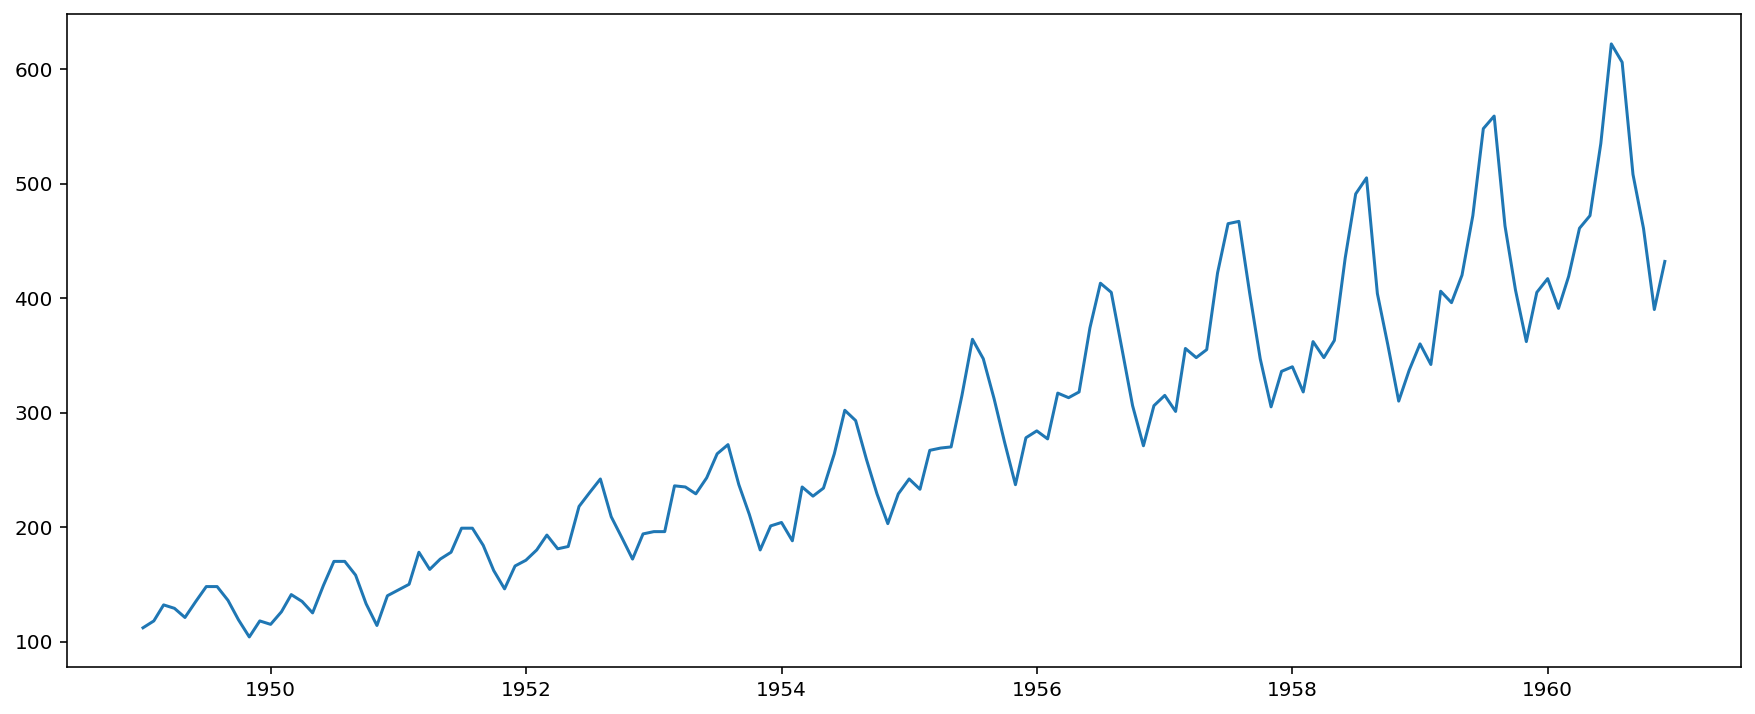

In [9]:
# Vamos a visualizar la evolución de nuestra variable
plt.plot(df)

In [20]:
# Vamos a comprobar si la serie temporal es estacionaria utilizando una métrica estadística llamada test de Dickey-Fuller
# que vamos a calcular con la libreria adfuller que hemos importado

def test_stationarity(timeseries):
    # Determining rolling statistics
    rol_mean = timeseries.rolling(window=12, center=False).mean()
    rol_std = timeseries.rolling(window=12, center=False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='b', label='Original')
    mean = plt.plot(rol_mean, color='r', label='Media acumulada')
    std = plt.plot(rol_std, color='black', label='Desviación típica acumulada')
    plt.legend(loc='best')
    plt.title('Media y desviación típica acumuladas')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Resultados del test Dickey-Fuller:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value',
                                             '#Lags Usados',
                                             'Número de observaciones usadas'])
    for key,value in dftest[4].items():
        dfoutput['Valor crítico (%s)'%key] = value
    print(dfoutput)

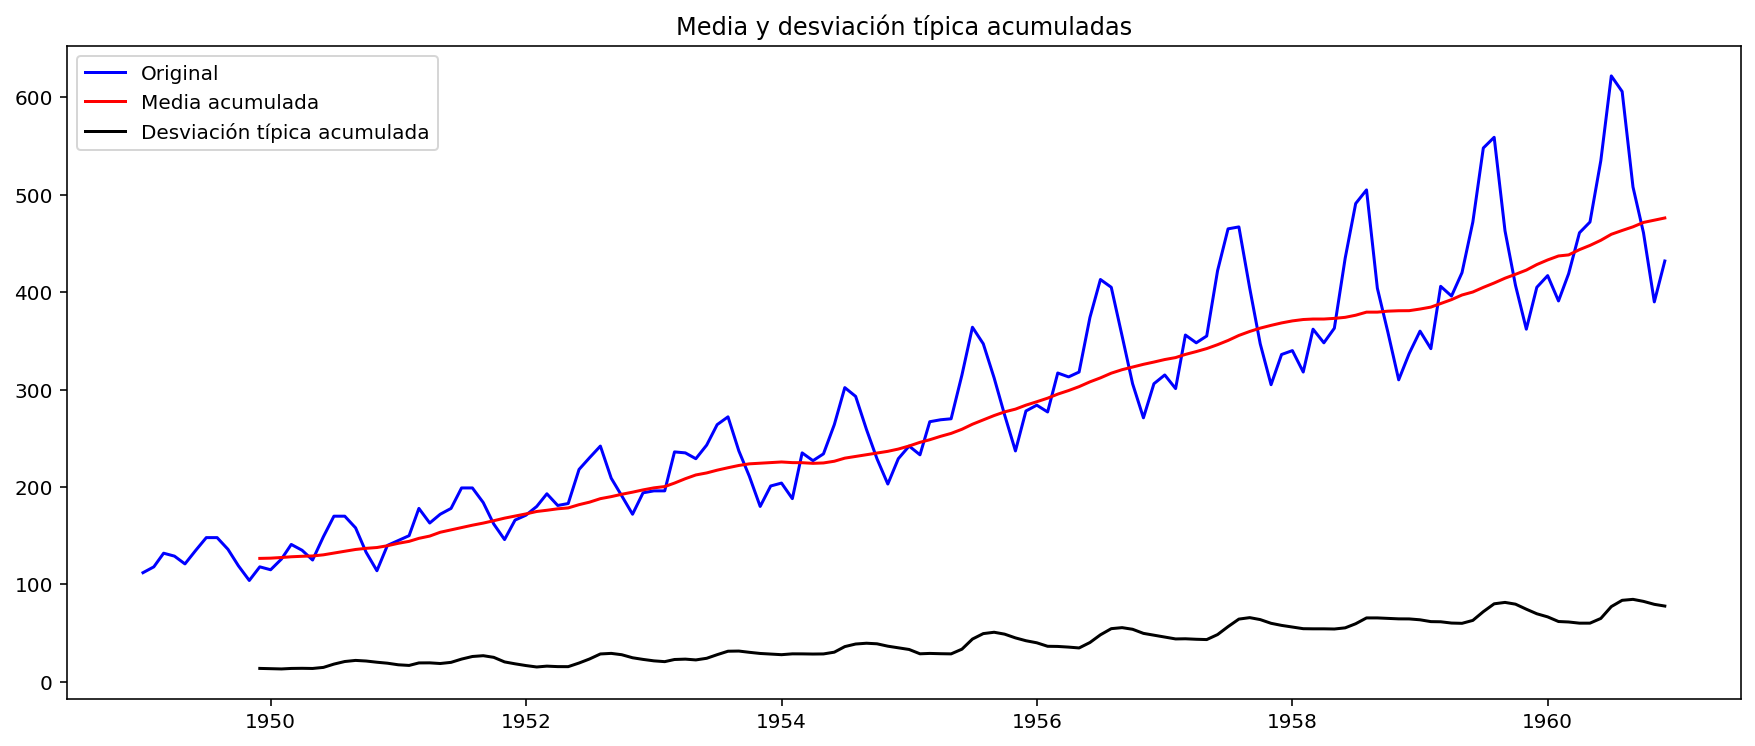

Resultados del test Dickey-Fuller:
Test Statistic                      0.815369
p-value                             0.991880
#Lags Usados                       13.000000
Número de observaciones usadas    130.000000
Valor crítico (1%)                 -3.481682
Valor crítico (5%)                 -2.884042
Valor crítico (10%)                -2.578770
dtype: float64


In [21]:
test_stationarity(df['#Passengers'])

Sin entrar en discutir como funciona el test estadístico que hemos utilizado, nos podemos quedar con la intuición de que si el Test Statistic es menor que los valores críticos, entonces la serie temporal es estacionaria. En nuestro caso no es así, puesto que hay una tendencia ascendente en nuestros datos a lo largo del tiempo con algunos efectos de estacionalidad (probablemente debidos a los periodos de vacaciones en esos años para los que tenemos datos). 

In [23]:
# Vamos a crear un modelo ARIMA con los datos tal y como están
# Definimos los hiperparámetros para el modelo como hemos discutido antes (p,q,d)
hiperparametros = (2,1,2)
modelo = ARIMA(df['#Passengers'],order=hiperparametros)
resultados = modelo.fit(disp=-1)

No handles with labels found to put in legend.


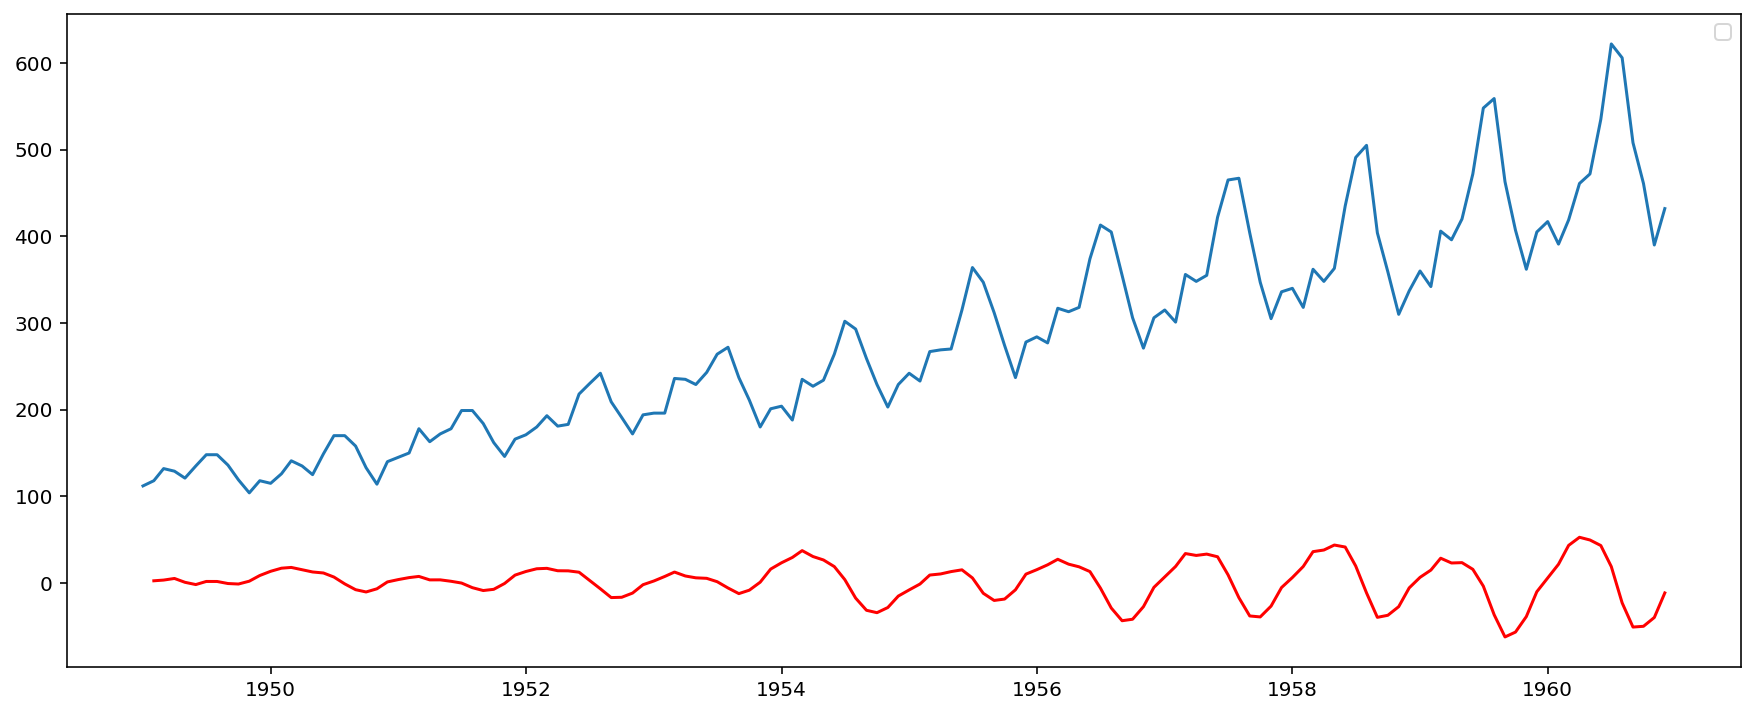

In [27]:
plt.plot(df['#Passengers'])
plt.plot(resultados.fittedvalues, color='r')

Como podemos ver nuestra predicción (en rojo) falla claramente a la hora de intentar reproducir el comportamiento de nuestra serie temporal (en azul). Esto se debe a la falta de estacionalidad que presentan los datos y que impactan claramente en el desempeño de este modelo. 

Vamos a proceder a transformar los datos para conseguir que sean estacionarios y ver el efecto que tiene en la predicción del modelo de ARIMA. 


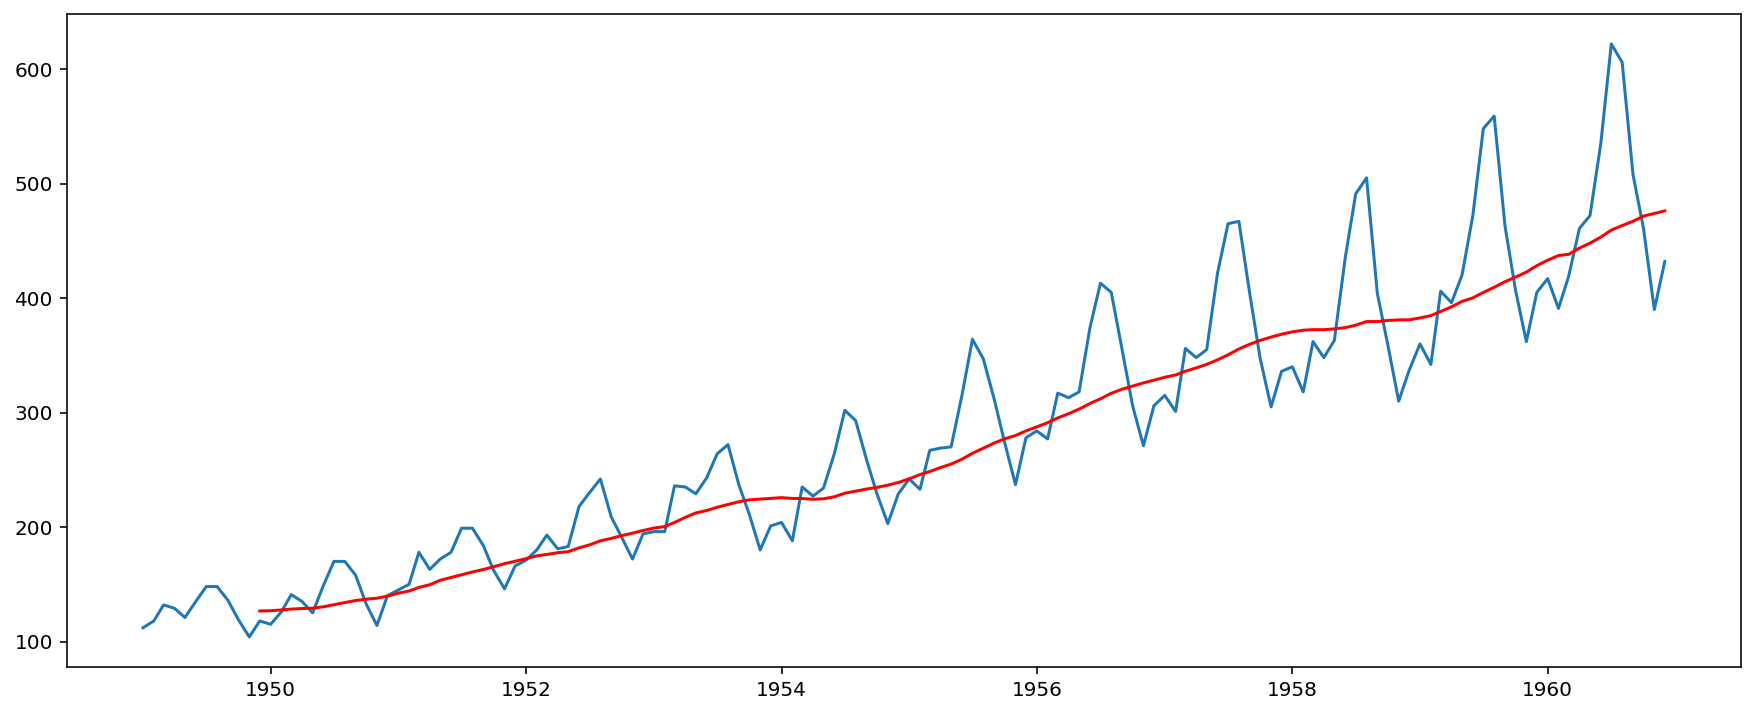

In [28]:
# El primer paso va a ser intentar eliminar la tendencia de nuestros datos
# restando la desviación típica de los datos, que vamos a calcular utilizando la función rolling 
# de pandas

desviacion_tipica = df['#Passengers'].rolling(window=12,center=False).mean()
plt.plot(df['#Passengers'])
plt.plot(desviacion_tipica, color='r')

In [30]:
# como hemos utilizado una ventana de 12 valores, no tenemos desviación típica para los
# primeros 11 valores y al restarle la desviación típica perderemos esos valores
diferencia = df['#Passengers'] - desviacion_tipica
diferencia.dropna(inplace=True)

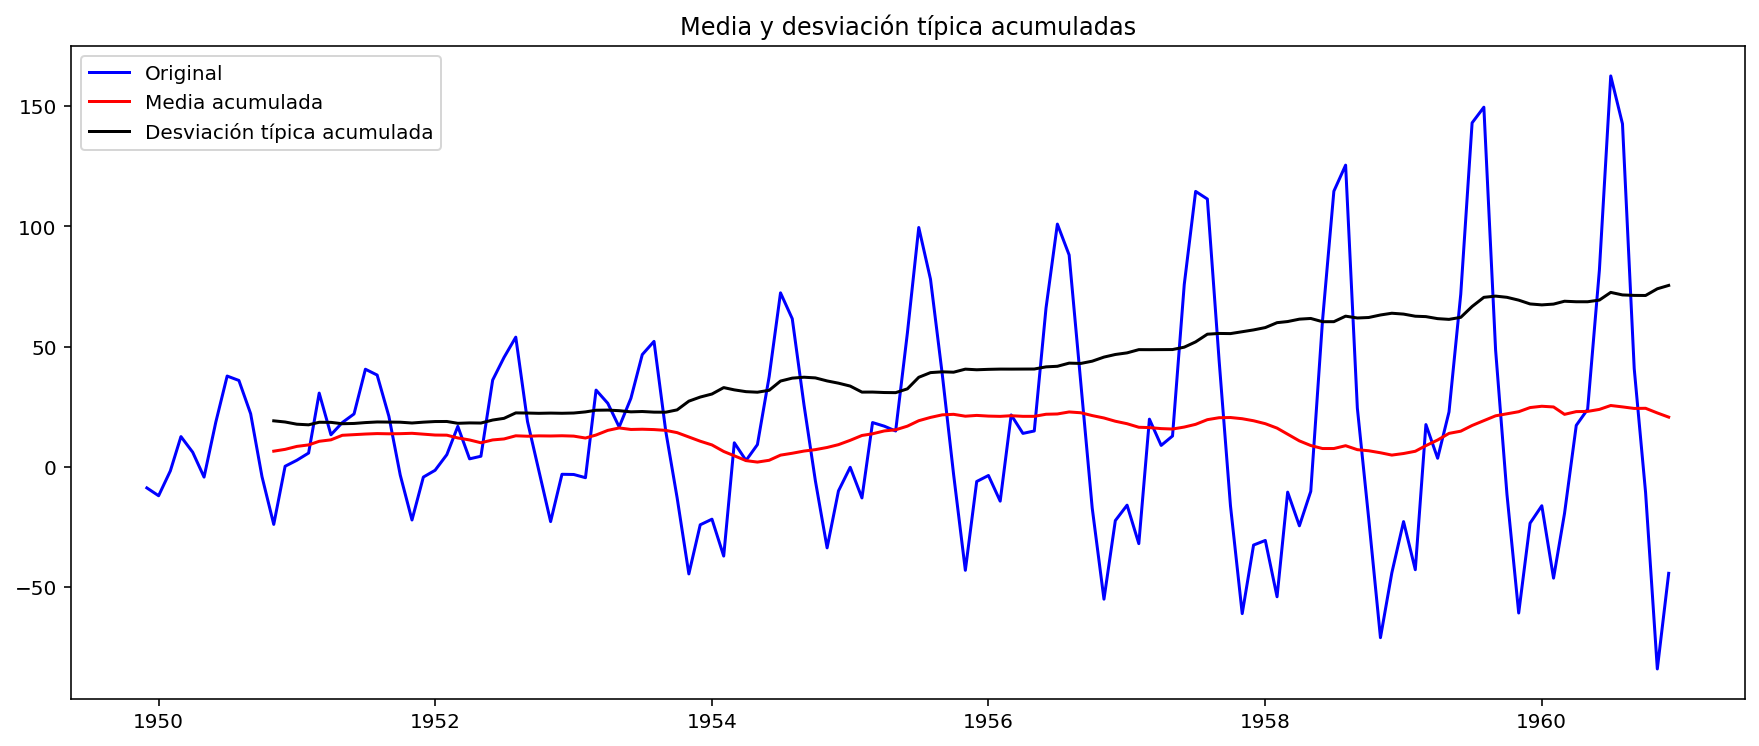

Resultados del test Dickey-Fuller:
Test Statistic                     -3.164968
p-value                             0.022104
#Lags Usados                       13.000000
Número de observaciones usadas    119.000000
Valor crítico (1%)                 -3.486535
Valor crítico (5%)                 -2.886151
Valor crítico (10%)                -2.579896
dtype: float64


In [31]:
# Vamos a ver el resultado de nuestro test estadístico en nuestros datos transformados
test_stationarity(diferencia)

Hemos conseguido reducir significativamente la diferencia entre el Test Statistic y los valores críticos y esta serie temporal se acerca mucho más a ser estacionaria que la serie temporal original. Vamos a ver qué tal funciona el modelo ARIMA sobre esta nueva serie temporal

In [32]:
modelo_no_estacionario = ARIMA(diferencia, order=hiperparametros)
resultados_no_estacionario = modelo_no_estacionario.fit()

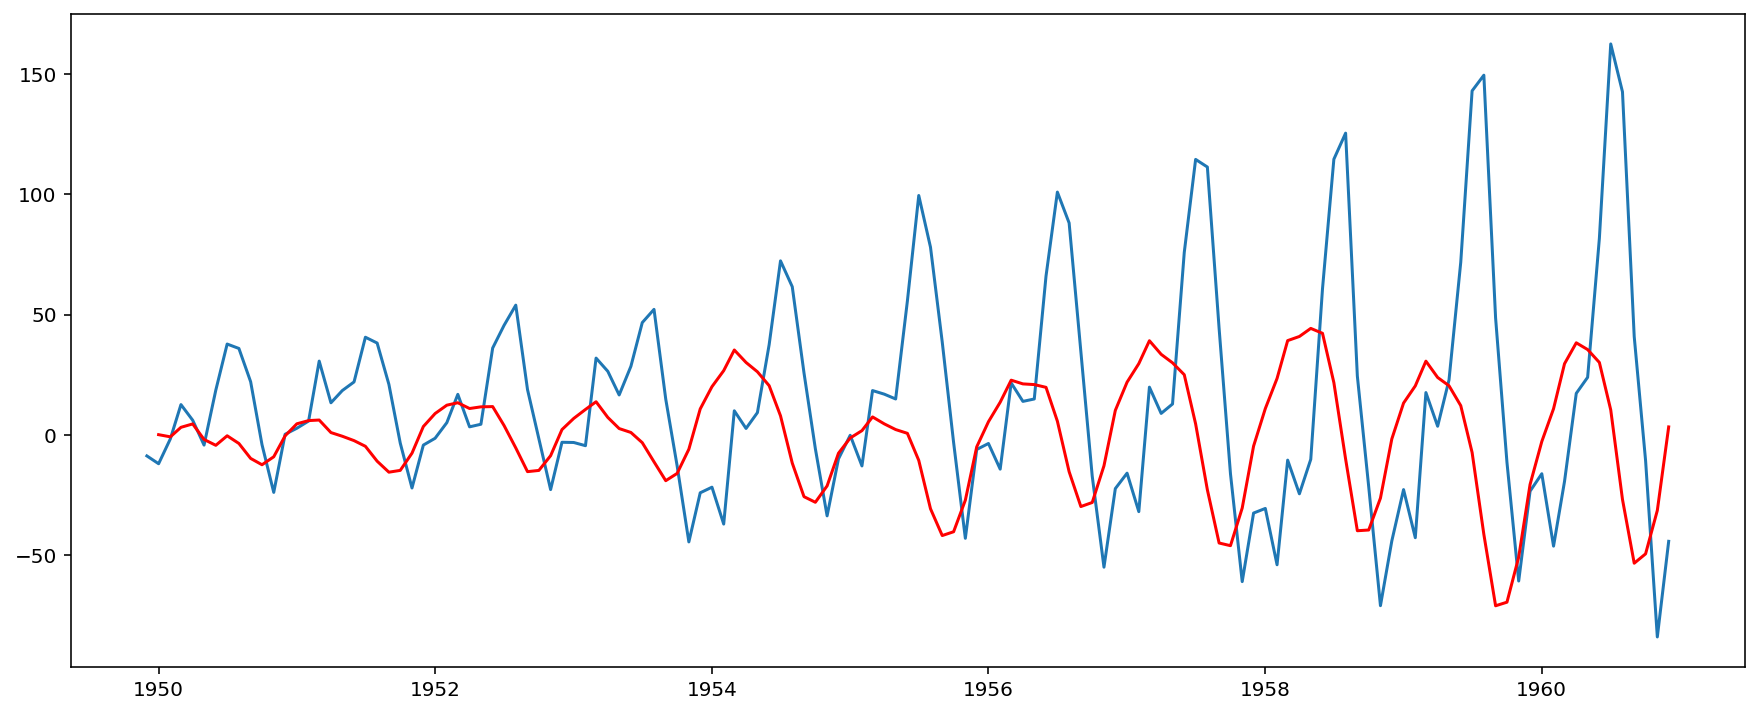

In [33]:
plt.plot(diferencia)
plt.plot(resultados_no_estacionario.fittedvalues, color='r')

Aunque el resultado no es perfecto, podemos ver que la predicción de nuestro modelo es bastante más aproximada a los valores reales de nuestra serie temporal. 

## FBProphet

FBProphet es un modelo para series temporales desarrollado por el departamento de data science de Facebook que ha sido liberado como código abierto para que pueda ser utilizado por cualquier persona. 

Prophet es un modelo muy útil para conjuntos de datos: 
- Que contengan un periodo de tiempo extendido (meses o años) de observaciones históricas detalladas (por días por defecto, aunque se puede ajustar para que trabaje con horas o semanas) 
- Que tengan una o varias estacionalidades muy marcadas
- Que incluyan eventos anteriormente conocidos importantes, pero irregulares
- Que le falten datos o tengan casos atípicos (outliers) grandes
- Que tengan tendencias de crecimiento no lineales

La implementación interna de Prophet se presentó en este [paper](https://peerj.com/preprints/3190/). 

Nosotros nos vamos a quedar con algunas de sus características: 
- Nos proporciona con los componentes de estacionalidad diaria, semanal y anual. De esta forma podemos ver los efectos de la estacionalidad de nuestros datos a distintos niveles. 
- Nos ofrece un parámetro de entrada llamado holidays. Este parámetro nos permite pasarle al modelo un array con fechas que nosotros consideramos que corresponde con eventos extraños que no reflejan el comportamiento habitual de nuestra variable. Por ejemplo el black friday si estamos tratando con datos que reflejen ventas online. Al proporcionarle esa lista de fechas especiales, el modelo atenúa el efecto de las variaciones que encuentra en esos puntos concretos y reducimos el error global de las predicciones de nuestro modelo. 
- Como hemos dicho antes, este modelo funciona bien con datos que no son estacionarios, donde hemos visto que el modelo ARIMA sufría en su desempeño.  


Una peculiaridad de Prophet es que espera que los datos que le pasemos esten en una estructura en concreto. El modelo espera recibir un dataframe con una columna que se llame ds que contenga los valores de las fechas y una columna que se llame y que contenga los valores de la variable con la que vamos a trabajar

Prophet presenta una interfaz en Python igual que la de los modelos de scikit-learn, un método *fit* para entrenar el modelo con los datos y un método *predict* para generar predicciones. Vamos a ver qué tal funciona Prophet con los anteriores datos:


In [34]:
from fbprophet import Prophet

In [35]:
# Leemos los datos de entrada y transformamos nuestras fechas igual que hemos hecho antes
df = pd.read_csv('AirPassengers.csv',
                 parse_dates =['Month'], # transforma la columna con la fecha
                 date_parser=dateparser)

In [36]:
# Transformamos los datos para que esten en el formato que espera Prophet
df['y'] = df['#Passengers']
df['ds'] = df['Month']
df = df.drop(['Month', '#Passengers'], axis=1)
df.head()


,y,ds
0,112,1949-01-01
1,118,1949-02-01
2,132,1949-03-01
3,129,1949-04-01
4,121,1949-05-01


In [37]:
# Vamos a crear nuestro modelo con Prophet
modelo_prophet = Prophet().fit(df)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
# Ahora vamos a pedirle que nos genere predicciones para los siguientes dos años

future = modelo_prophet.make_future_dataframe(periods=730) # A pesar de que nuestros datos son mensuales, Prophet trabaja por defecto con dias y por lo tanto debemos pedirle que nos genere los siguientes 730 dias
predicciones_prophet = modelo_prophet.predict(future)

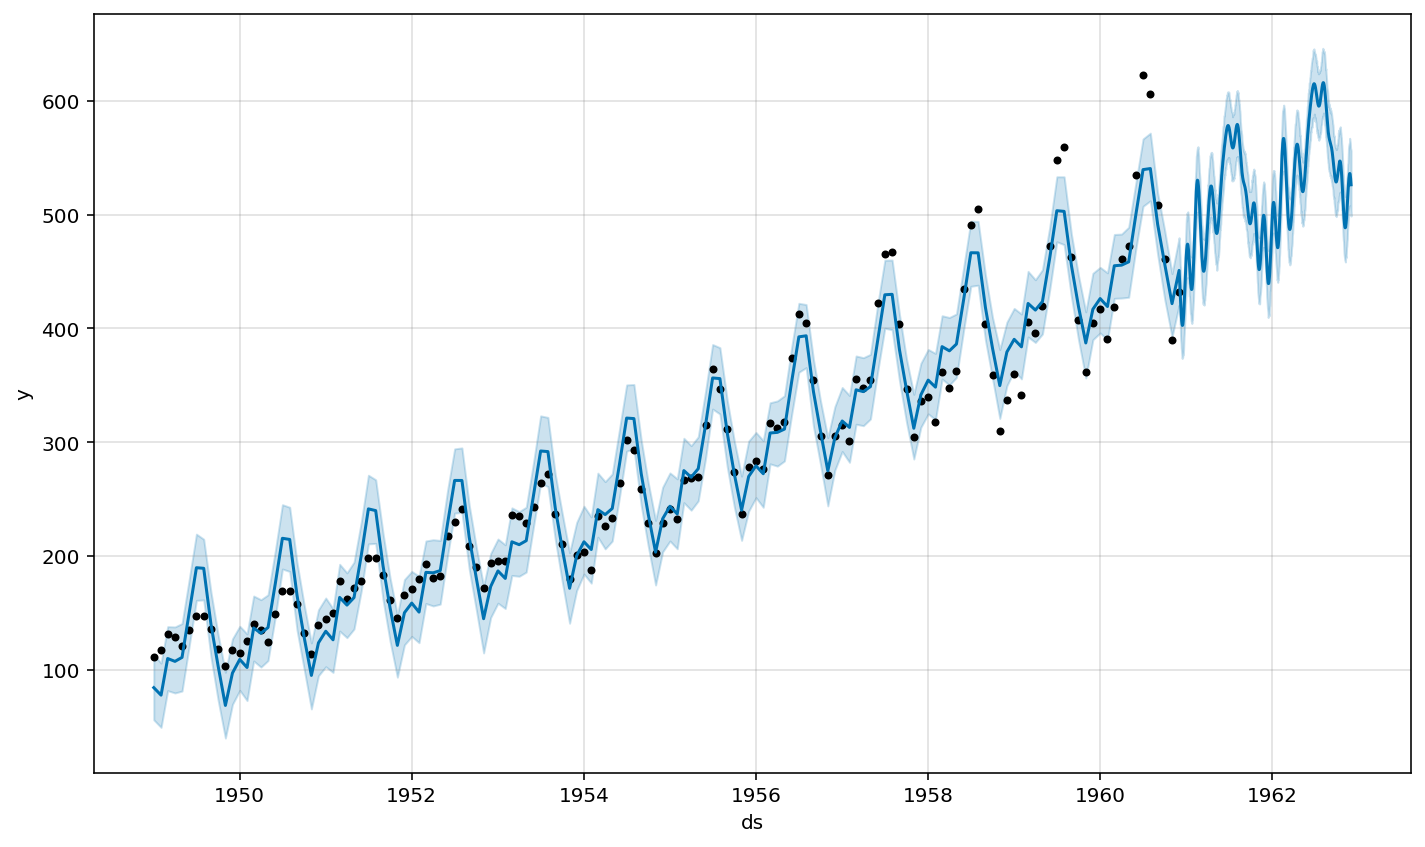

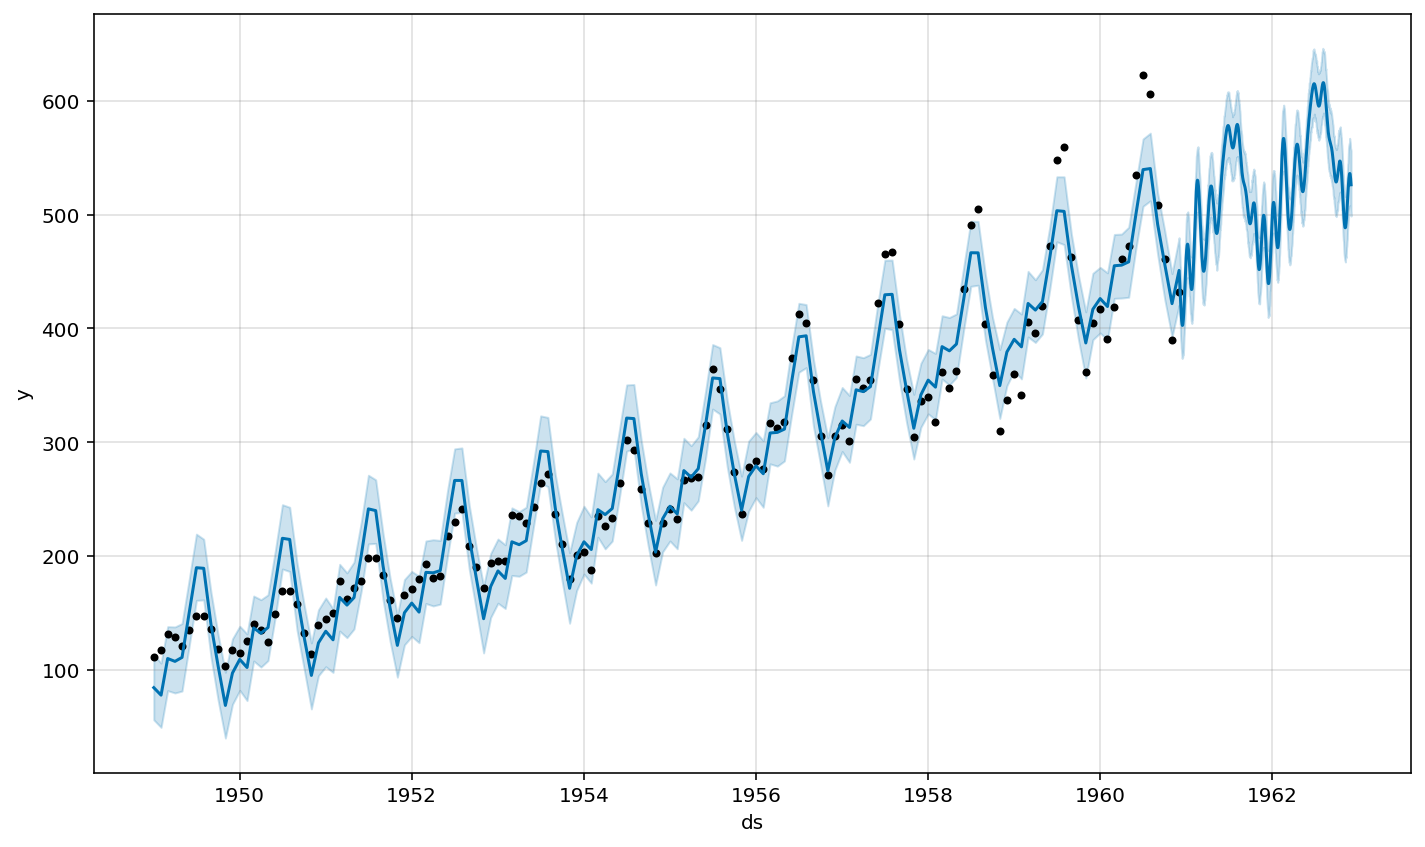

In [42]:
# Vamos a visualizar las predicciones que ha generado Prophet
modelo_prophet.plot(predicciones_prophet)

Como podemos ver en el gráfico, los puntos son los valores reales que tenemos de nuestra serie temporal que hemos utilizado para entrenar el modelo. La línea azúl representa la predicción del modelo y el área azúl alrededor de la predicción del modelo representa el intervalo de confianza de la predicción, es decir, las posibles variaciones que puede tener los valores de las predicciones. 

Según vayamos pidiendo al modelo que genere más predicciones en el futuro, más grande será el intervalo de confianza de las predicciones puesto que la incertidumbre del modelo será mayor. 

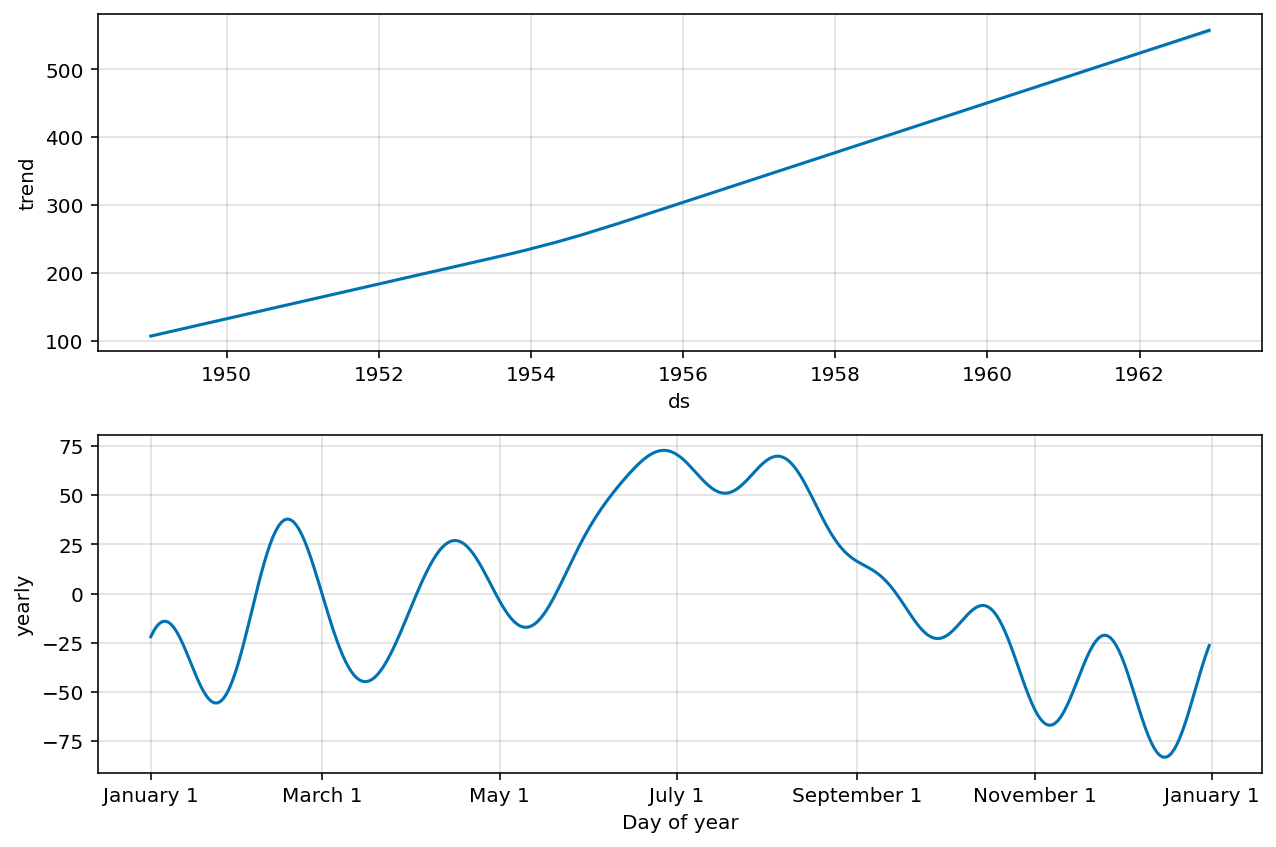

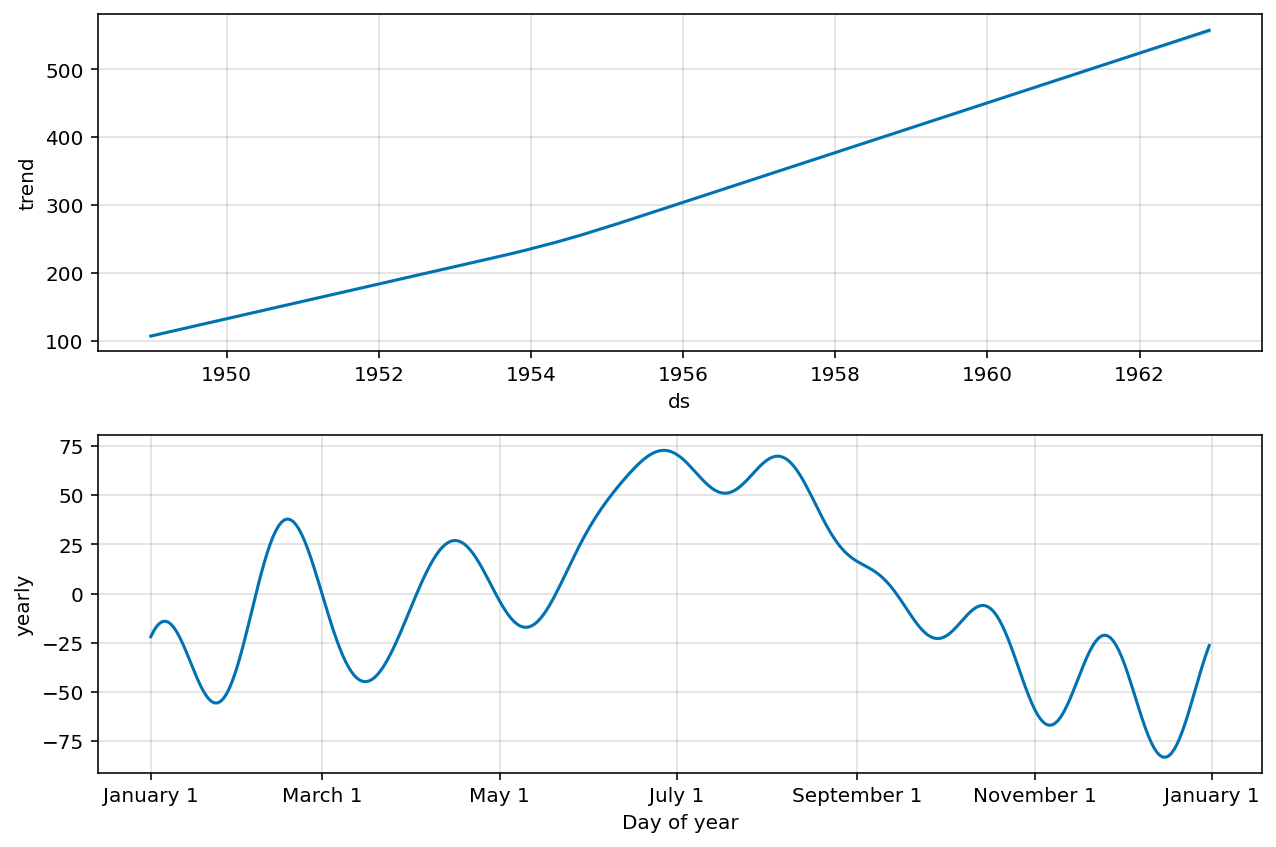

In [43]:
# También podemos verlos componentes que identifica el Prophet de tendencias y de estacionalidad
modelo_prophet.plot_components(predicciones_prophet)

Dado que nuestros datos son mensuales, Prophet descarta automáticamente las componentes de estacionalidad diaria y semanal puesto que no tenemos datos con esa granularidad. 

Podemos ver que los valores de la variable, los pasajeros de la aerolínea, crecen fuertemente en Julio y Agosto, coincidiendo con las vacaciones de verano, y tienen una tendencia a descender durante la segunda parte del año. 